In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df = pd.read_csv('../data/clean_df.csv', index_col=0)
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,0,1,25,110,45.07,99,16.78,91,11.01,3,2.70,1,0
1,OH,107,415,0,1,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0
2,NJ,137,415,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0
3,OH,84,408,1,0,0,71,50.90,88,5.26,89,8.86,7,1.78,2,0
4,OK,75,415,1,0,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0


### Will be analyzing the top 3 feature importances from my best model
- customer service calls
- total day charge
- international plan

In [3]:
df_stay = df[df.churn == 0]
df_churn = df[df.churn == 1]

## Customer Service Calls

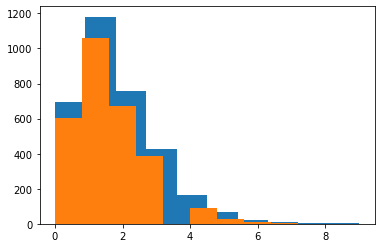

In [4]:
plt.hist(df['customer service calls']), plt.hist(df_stay['customer service calls']);

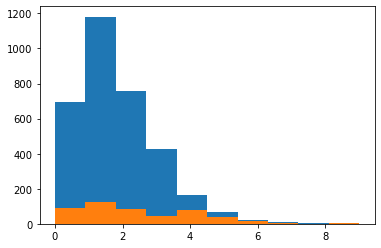

In [5]:
plt.hist(df['customer service calls']), plt.hist(df_churn['customer service calls']);

In [6]:
df_viz = df.copy()
df_viz.loc[df_viz['customer service calls'] >= 6, 'customer service calls'] = 6

In [7]:
df_viz['customer service calls'].value_counts().sort_index().index

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')

In [8]:
df_viz_churn = df_viz[df_viz.churn==1]

In [9]:
df_viz['customer service calls'].value_counts().sort_index().index.tolist()

[0, 1, 2, 3, 4, 5, 6]

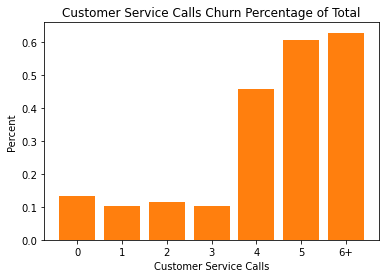

In [10]:
plt.bar((df_viz['customer service calls'].value_counts().sort_index().index), (df_viz_churn['customer service calls'].value_counts().sort_index().values / df_viz['customer service calls'].value_counts().sort_index().values),
       color='tab:orange')

plt.xticks(ticks=df_viz['customer service calls'].value_counts().sort_index().index, labels=['0','1','2','3','4','5','6+'])
plt.xlabel('Customer Service Calls')
plt.ylabel('Percent')
plt.title('Customer Service Calls Churn Percentage of Total')

plt.savefig('../images/customers_service_calls.jpg',
            transparent = False,bbox_inches="tight")
plt.show();

In [11]:
viz_churn = df_viz_churn['customer service calls'].value_counts().sort_index().values
viz_total = df_viz['customer service calls'].value_counts().sort_index().values
viz_percent = np.ndarray.round(viz_churn/viz_total *100, decimals=2)
print(f"""
churn : {viz_churn} \n
total : {viz_total} \n
Percent : {viz_percent} %""")



churn : [ 92 122  87  44  76  40  22] 

total : [ 697 1181  759  429  166   66   35] 

Percent : [13.2  10.33 11.46 10.26 45.78 60.61 62.86] %


appears that by 4 customers calls ooks like a drastic amount of people drop or switch to a different provider.

.

.

.

## Total Day Charge

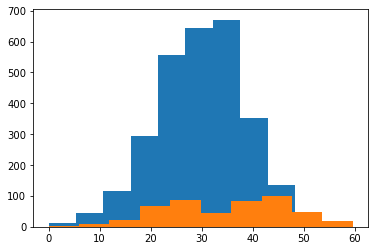

In [12]:
plt.hist(df_stay['total day charge']), plt.hist(df_churn['total day charge']);

In [13]:
churn_tdc_list = list(df_churn['total day charge'])
result = stats.ttest_1samp(churn_tdc_list, df_stay['total day charge'].mean())
t_stat, p_value = result
result

Ttest_1sampResult(statistic=10.109228512661401, pvalue=6.4305424235249905e-22)

There is a difference!!

In [14]:
df_stay['total day charge'].mean(), df_churn['total day charge'].mean()

(29.780421052631578, 35.17592132505176)

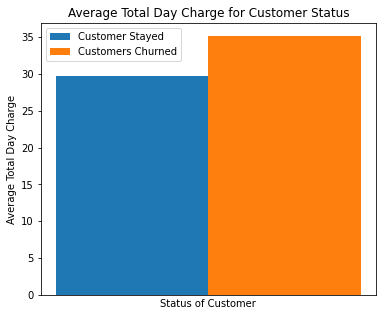

In [15]:
# Numbers of pairs of bars you want
N = 1

# Data on X-axis

# Specify the values of blue bars (height)
blue_bar = (df_stay['total day charge'].mean())
# Specify the values of orange bars (height)
orange_bar = (df_churn['total day charge'].mean())

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(6,5))

# Width of a bar 
width = 0.2      

# Plotting
plt.bar(ind, blue_bar , width, label='Customer Stayed')
plt.bar(ind + width, orange_bar, width, label='Customers Churned')

plt.xlabel('Status of Customer')
plt.ylabel('Average Total Day Charge')
plt.title('Average Total Day Charge for Customer Status')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks([])

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

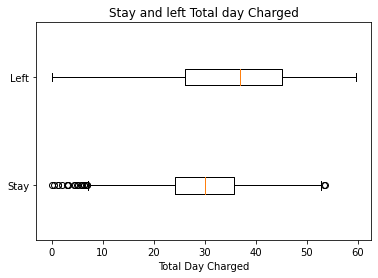

In [16]:
boxs = {'Stay': df_stay['total day charge'], 'Left':df_churn['total day charge']}
fig, ax = plt.subplots()
ax.boxplot(boxs.values(), vert=False)
ax.set_yticklabels(boxs.keys())
ax.set_xlabel('Total Day Charged')
ax.set_title('Stay and left Total day Charged');  

In [17]:
churn_tdc_quartiles = np.percentile(churn_tdc_list, [25,50,75]) 
stay_tdc_quartiles = np.percentile(list(df_stay['total day charge']), [25,50,75])

print(f"""
Churn quartiles on total day charged {churn_tdc_quartiles}. \n
Customers still doing service with quartiles on total day charged {stay_tdc_quartiles}."""
)


Churn quartiles on total day charged [26.055 36.99  45.21 ]. 

Customers still doing service with quartiles on total day charged [24.2825 30.12   35.75  ].


In [18]:
df_stay_viz = df_stay.copy()
df_churn_viz = df_churn.copy()

In [19]:
vc0 = df_churn_viz.loc[df_churn_viz['total day charge'] <= churn_tdc_quartiles[0]]
vc1 = df_churn_viz.loc[df_churn_viz['total day charge'] <= churn_tdc_quartiles[1]]
vc2 = df_churn_viz.loc[df_churn_viz['total day charge'] <= churn_tdc_quartiles[2]]
vc3 = df_churn_viz.loc[df_churn_viz['total day charge'] >= churn_tdc_quartiles[2]]
vc_mean = [vc0['total day charge'].mean(), vc1['total day charge'].mean(),vc2['total day charge'].mean(),vc3['total day charge'].mean()]

vs0 = df_stay_viz.loc[df_stay_viz['total day charge'] <= stay_tdc_quartiles[0]]
vs1 = df_stay_viz.loc[df_stay_viz['total day charge'] <= stay_tdc_quartiles[1]]
vs2 = df_stay_viz.loc[df_stay_viz['total day charge'] <= stay_tdc_quartiles[2]]
vs3 = df_stay_viz.loc[df_stay_viz['total day charge'] >= stay_tdc_quartiles[2]]
vs_mean = [vs0['total day charge'].mean(), vs1['total day charge'].mean(),vs2['total day charge'].mean(),vs3['total day charge'].mean()]

In [20]:
vc_mean, vs_mean

([19.819917355371903, 25.14111570247934, 30.40419889502763, 49.45165289256199],
 [18.680575035063114,
  22.974205738278517,
  26.286816269284714,
  40.27163865546218])

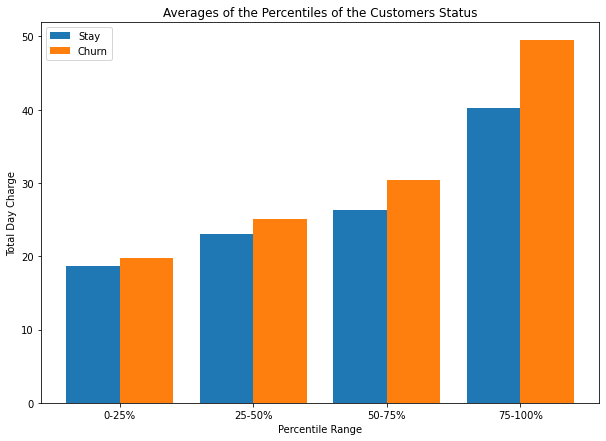

In [21]:
#Plot median performance at the box office

fig,ax = plt.subplots(figsize = (10,7))

labels = ['0-25%','25-50%','50-75%', '75-100%']
#Graphs for median gross/net revenue by the month
x = np.arange(len(labels)) 
w = 0.4

ax.set_title(f'Averages of the Percentiles of the Customers Status')

ax.bar(x-w/2, vs_mean, w)
ax.bar(x+w/2, vc_mean, w)

plt.xticks(x, labels=labels)
ax.set_xlabel('Percentile Range')
ax.set_ylabel('Total Day Charge')

ax.legend(['Stay', 'Churn'])

fig.savefig('../images/customers_status_percentile_averages.jpg',
             transparent = False,bbox_inches="tight", dpi=500);

.

.

.

## International Plan

In [22]:
no_int_len = len(df[df["international plan"]==0])
int_len = len(df[df["international plan"]==1])

no_int_chrun_len = len(df.loc[(df["international plan"]==0) & (df.churn == 1)])
int_chrun_len = len(df.loc[(df["international plan"]==1) & (df.churn == 1)])

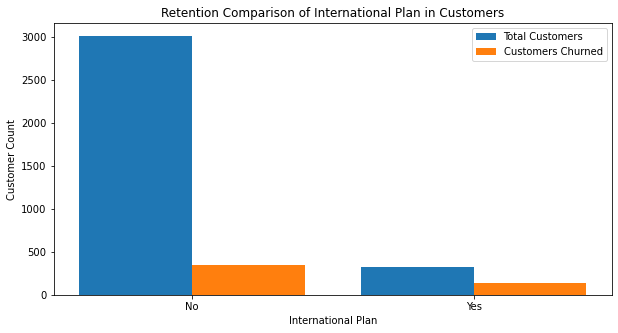

In [23]:
# Numbers of pairs of bars you want
N = 2

# Data on X-axis

# Specify the values of blue bars (height)
blue_bar = (no_int_len, int_len)
# Specify the values of orange bars (height)
orange_bar = (no_int_chrun_len, int_chrun_len)

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.4      

# Plotting
plt.bar(ind, blue_bar , width, label='Total Customers')
plt.bar(ind + width, orange_bar, width, label='Customers Churned')

plt.xlabel('International Plan')
plt.ylabel('Customer Count')
plt.title('Retention Comparison of International Plan in Customers')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, ('No', 'Yes'))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.savefig('../images/retention_comparison_interrnational_plan.jpg')
plt.show();

In [24]:
no_international_churn = no_int_chrun_len / no_int_len *100

international_churn = int_chrun_len / int_len *100

print(f' Percent of people who churn when they do not have an international plan {round(no_international_churn)}%')
print(f' Percent of people who churn when they do have an international plan {round(international_churn)}%')

 Percent of people who churn when they do not have an international plan 11%
 Percent of people who churn when they do have an international plan 42%
